# ABM Value Change - Explore model outcomes

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tristandewildt/ABM_Value_Change/blob/main/Explore_model_outcomes.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tristandewildt/ABM_Value_Change/blob/main/Explore_model_outcomes.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

# 1. Import files

In [35]:
pip install pandas==1.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.7 MB 5.1 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [1]:
pip install ema-workbench

from ema_workbench.analysis import prim
from ema_workbench.analysis import feature_scoring

import sys
import os

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from statistics import mean

from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed

from pprint import pprint
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, interactive

from ema_workbench import ema_logging, load_results
ema_logging.log_to_stderr(level=ema_logging.INFO)

from ema_workbench.analysis.plotting import envelopes, lines, kde_over_time
import ema_workbench.analysis.prim as prim

/usr/local/lib/python3.8/dist-packages/ema_workbench/em_framework/evaluators.py:58: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
!git clone https://www.github.com/tristandewildt/ABM_Value_Change.git

fatal: destination path 'ABM_Value_Change' already exists and is not an empty directory.


In [23]:
# Generate file list
local_download_path = os.path.expanduser('ABM_Value_Change/Results')
try:
  os.makedirs(local_download_path)
except: pass

print("Experiments to choose from:")
for filename in os.listdir(local_download_path):
  if filename.startswith("Output_file_results"):
    print("   - "+str(filename))

Experiments to choose from:
   - Output_file_results_256_runs_model_version_v33_Resistance_to_change_variables_changing_with_values


In [30]:
selected_file = "Output_file_results_256_runs_model_version_v33_Resistance_to_change_variables_changing_with_values"

df_results = pd.read_pickle("ABM_Value_Change/Results/"+str(selected_file))
df_experiments_string = selected_file.replace("results", "experiments" )
df_experiments = pd.read_pickle("ABM_Value_Change/Results/"+str(df_experiments_string))
df_uncertainties_adjust = df_experiments.copy()
list_scenarios = []
list_policy = []
list_model = []
for i in range(len(df_uncertainties_adjust)):
    list_scenarios.append(i)
    list_policy.append("None")
    list_model.append("simpleModel")
df_uncertainties_adjust['scenario'] = list_scenarios
df_uncertainties_adjust['policy'] = list_policy
df_uncertainties_adjust['model'] = list_model
df_uncertainties_adjust.set_index('scenario')
df_uncertainties_adjust['scenario'] = list_scenarios
df_experiments = df_uncertainties_adjust.copy()

In [26]:
list_experiments =["Inevitability_of_values", "Lock-in", "Resistance_to_change","Moral_revolutions"]
list_settings = ["no_variables_changing_with_values", "variables_changing_with_values", "no_variables_changing_without_values", "variables_changing_without_values"]

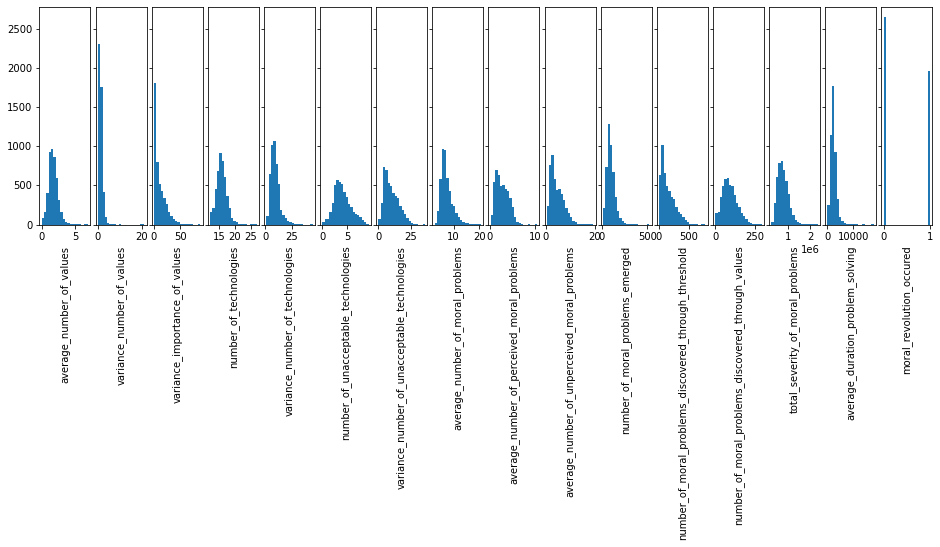

In [27]:
fig, ax = plt.subplots(1,len(df_results.columns), sharey=True)

for i, n in enumerate(df_results.columns):
    ax[i].hist(df_results[n], 20)
    ax[i].set_xlabel(n,rotation=90)
fig.set_size_inches(16,4)
fig.subplots_adjust(wspace=0.1)

plt.show()

In [8]:
def vis_kde(prim_outcome_header):
    df_results[prim_outcome_header].plot.kde()

widgets.interact(vis_kde, prim_outcome_header = df_results.keys().values.tolist())

interactive(children=(Dropdown(description='prim_outcome_header', options=('average_number_of_values', 'varian…

<function __main__.vis_kde(prim_outcome_header)>

# 2. Correlation analysis

##2.1. Output vs. Output

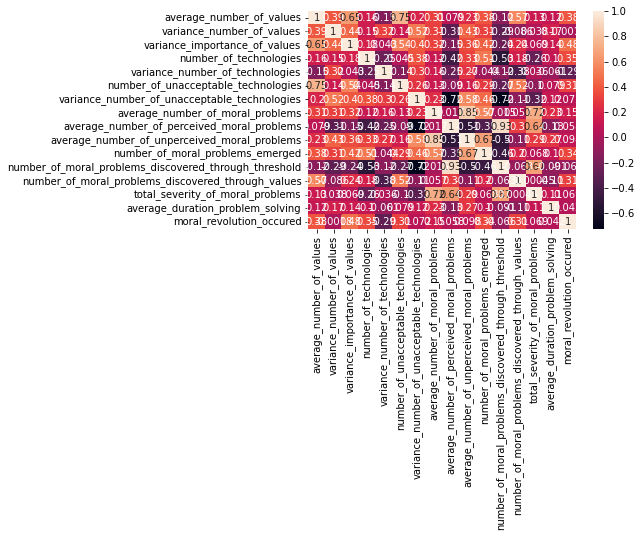

In [9]:
corr_matrix = df_results.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [10]:
def plot_input_output(output_variable_1, output_variable_2):
    d1 = df_results[output_variable_1]
    d2 = df_results[output_variable_2]
    combined_df = pd.concat([d1, d2], axis=1)
    if output_variable_1 != output_variable_2:
        #sns.lmplot(x=output_variable_1,y=output_variable_2,data=combined_df,fit_reg=True, line_kws={'color': 'red'}) 
        sns.lmplot(x=output_variable_1,y=output_variable_2,data=combined_df,lowess=True, line_kws={'color': 'red'}) 

widgets.interact(plot_input_output, output_variable_1 = df_results.keys().values.tolist(), output_variable_2 = df_results.keys().values.tolist())

interactive(children=(Dropdown(description='output_variable_1', options=('average_number_of_values', 'variance…

<function __main__.plot_input_output(output_variable_1, output_variable_2)>

## 2.2. Input vs. Output

In [11]:
def plot_input_output(input_variable, output_variable):
    d1 = df_experiments[input_variable]
    d2 = df_results[output_variable]
    combined_df = pd.concat([d1, d2], axis=1)
    #sns.lmplot(x=input_variable,y=output_variable,data=combined_df,fit_reg=True, line_kws={'color': 'red'}) 
    sns.lmplot(x=input_variable,y=output_variable,data=combined_df, lowess=True, line_kws={'color': 'red'}) 

widgets.interact(plot_input_output, input_variable = df_experiments.keys().values.tolist(), output_variable = df_results.keys().values.tolist())

interactive(children=(Dropdown(description='input_variable', options=('random-seed', 'Value_memory_of_society'…

<function __main__.plot_input_output(input_variable, output_variable)>

# 3. PRIM Analysis

In [12]:
pprint(df_results.keys().values.tolist())

['average_number_of_values',
 'variance_number_of_values',
 'variance_importance_of_values',
 'number_of_technologies',
 'variance_number_of_technologies',
 'number_of_unacceptable_technologies',
 'variance_number_of_unacceptable_technologies',
 'average_number_of_moral_problems',
 'average_number_of_perceived_moral_problems',
 'average_number_of_unperceived_moral_problems',
 'number_of_moral_problems_emerged',
 'number_of_moral_problems_discovered_through_threshold',
 'number_of_moral_problems_discovered_through_values',
 'total_severity_of_moral_problems',
 'average_duration_problem_solving',
 'moral_revolution_occured']


In [13]:
prim_outcome_header = "total_severity_of_moral_problems"

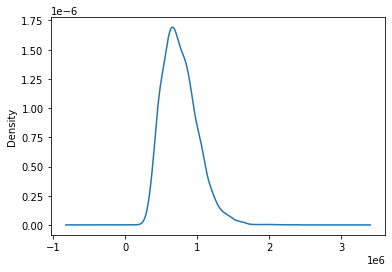

In [14]:
df_results[prim_outcome_header].plot.kde()

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 4608 points remaining, containing 1194 cases of interest
[MainProcess/INFO] mean: 0.640625, mass: 0.05555555555555555, coverage: 0.1373534338358459, density: 0.640625 restricted_dimensions: 7


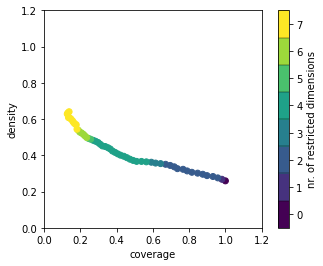

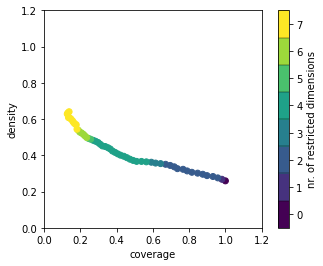

In [15]:
y = df_results[prim_outcome_header] > 900000
prim_alg = prim.Prim(df_experiments, y, threshold=0.6)
box1 = prim_alg.find_box()
box1.show_tradeoff()

Hereunder, change the 'y' so that the 'coverage' and 'density' returned are approximately similar.

coverage     0.406198
density      0.407906
id          25.000000
mass         0.258030
mean         0.407906
res_dim      4.000000
Name: 25, dtype: float64

                                box 25                             \
                                   min          max      qp value   
Openness_to_change            0.195312    53.906250           NaN   
Propensity_value_dynamism     0.001953     0.859375           NaN   
max_need_change               1.853516     3.993164  2.410117e-09   
frequency_of_need_change   1931.640625  9982.421875  3.291440e-01   

                                         
                               qp value  
Openness_to_change         9.146173e-09  
Propensity_value_dynamism  1.092763e-01  
max_need_change                     NaN  
frequency_of_need_change            NaN  



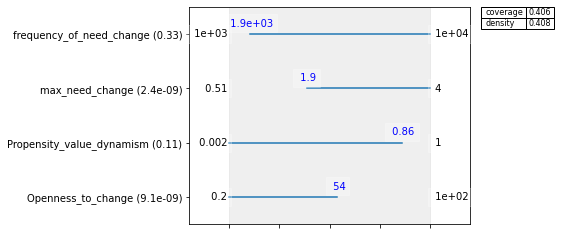

In [16]:
y = 25

box1.inspect(y)
box1.inspect(y, style='graph')
plt.show()

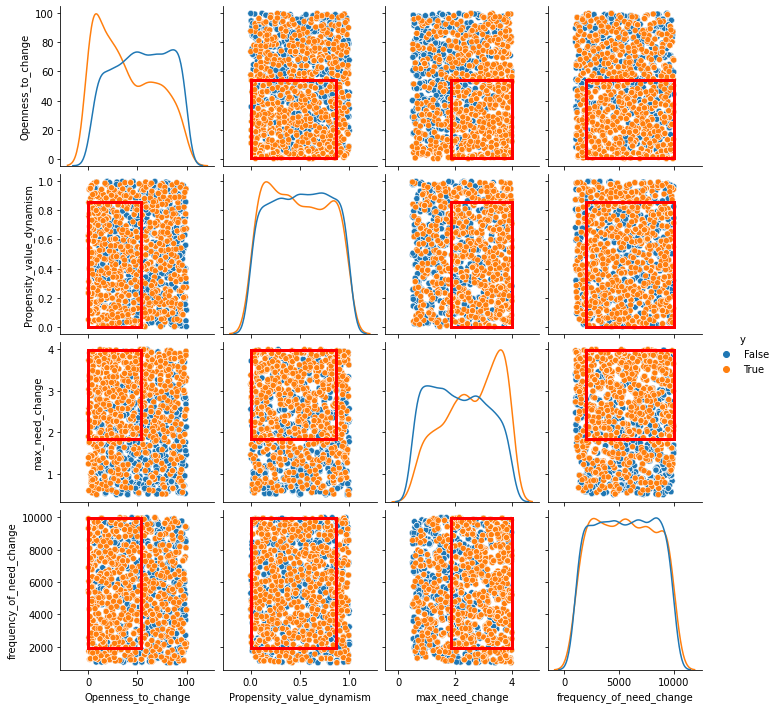

In [17]:
box1.show_pairs_scatter(y)
plt.show()

# 4. Feature scoring
Feature scoring is a family of techniques often used in machine learning to identify the most relevant features to include in a model. This is similar to one of the use cases for global sensitivity analysis, namely factor prioritisation.

[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] policy dropped from analysis because on

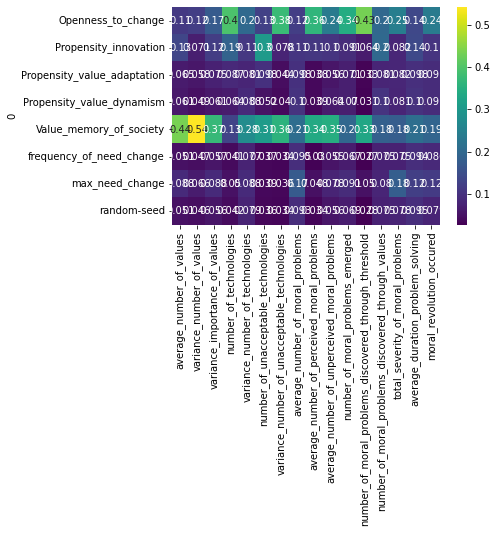

In [18]:
fs = feature_scoring.get_feature_scores_all(df_experiments, df_results)
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()